In [5]:
import os 
import sys 
# This gets the parent directory of the current notebook (or any known path)
notebook_dir = os.getcwd()  # Gets current working directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(parent_dir)





In [6]:
from agents.goat_agent import ReinforceGoatAgent, ActorCriticGoatAgent
from models.goat_model import ReinforceModel, ActorModel,CriticModel
from helpers.goat_env import GOAT_ENV
from matplotlib import pyplot as plt
from livelossplot import PlotLosses
import numpy as np
import torch
import traceback
torch.manual_seed(2) 


In [7]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 

In [8]:
print('cuda available',torch.cuda.is_available())

cuda available True


In [ ]:
def calculate_average_gradients(model):
    parameter_grads = []
    for param in model.parameters():
        parameter_grads.append(sum(param.grad.view(-1))/len(param.grad))
    return parameter_grads

In [ ]:
max_number_of_turns = 30
size = 5
goat_reward_scheme = {"winning": 0.1, "losing": -0.1}
tiger_reward_scheme = {"eating": 0.1, "winning": 0.5, "losing": -0.5,"no score":0}
goat_env = GOAT_ENV(size,max_number_of_turns, goat_reward_scheme, tiger_reward_scheme)
actor_model = ActorModel(size)
critic_model = CriticModel(size)
actor_optimizer = torch.optim.Adam(actor_model.parameters(), lr=0.001)
critic_optimizer = torch.optim.Adam(critic_model.parameters(), lr=0.001)
goat_agent = ActorCriticGoatAgent(actor_model,critic_model,goat_env,size,goat_reward_scheme,actor_optimizer,critic_optimizer,max_number_of_turns)

number_of_runs = 1000000

avg_gradients = []

def main():
    monitoring_plot = PlotLosses()
    avg_rewards = []
    critic_losses = []
    step = 2000

    for i in range(number_of_runs):
        try:
            avg_reward, critic_loss = goat_agent.learn()
            avg_rewards.append(avg_reward)
            critic_losses.append(critic_loss)

            if i % step == 0 and i != 0:
                monitoring_plot.update({
                    'average reward (last {})'.format(step): np.mean(avg_rewards[-step:]),
                    'average critic loss (last {})'.format(step): np.mean(critic_losses[-step:])
                })
                monitoring_plot.draw()

        except Exception as e:
            print(f"Exception occurred on run {i}: {e}")
            traceback.print_exc()
            break
          
            
        

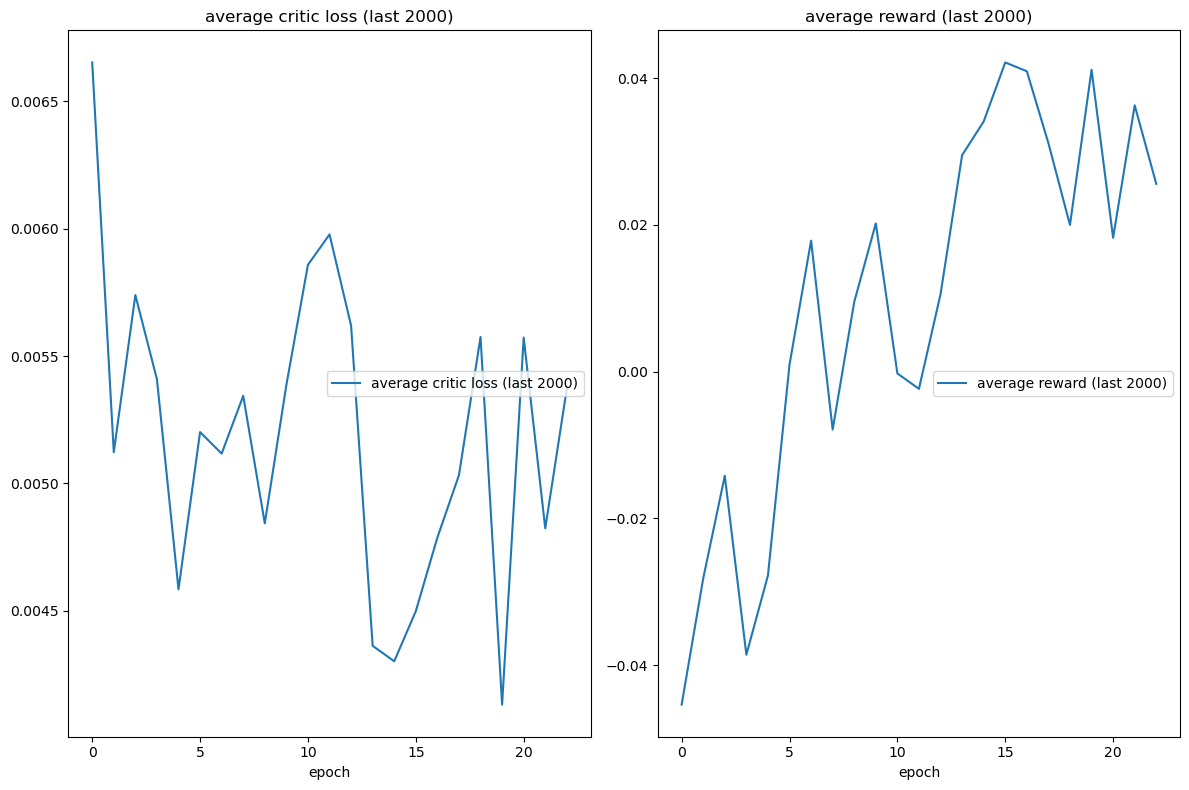

average critic loss (last 2000)
	average critic loss (last 2000) 	 (min:    0.004, max:    0.007, cur:    0.005)
average reward (last 2000)
	average reward (last 2000) 	 (min:   -0.045, max:    0.042, cur:    0.026)
state [[0 2 2 2 1]
 [0 2 2 2 2]
 [2 2 2 2 2]
 [2 0 2 2 0]
 [1 1 2 2 1]]
action probs tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan], device='cuda:0', grad_fn=<SqueezeBackward0>)
goat or spot selection tensor([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]], grad_fn=<ViewBackward0>)
filtered goat or spot selection tensor([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan,

Traceback (most recent call last):
  File "C:\Users\MaxA\AppData\Local\Temp\ipykernel_24108\132339272.py", line 22, in main
    avg_reward, critic_loss = goat_agent.learn()
                              ^^^^^^^^^^^^^^^^^^
  File "c:\Users\MaxA\Desktop\Bhag Chal\goat_agent.py", line 322, in learn
    goat_or_spot_action, goat_move_action, goat_or_spot_dist, goat_move_dist = self.predict_action(current_state, all_goats_placed_flag)
                                                                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MaxA\Desktop\Bhag Chal\goat_agent.py", line 459, in predict_action
    raise ValueError("Goat or spot selection probabilities sum to 0")
ValueError: Goat or spot selection probabilities sum to 0


In [ ]:
main()

In [ ]:
import torch
torch.save(actor_model.state_dict(), 'weights/goat_weights/actor_model_v1_size_3.pth')
torch.save(critic_model.state_dict(), 'weights/goat_weights/critic_model_v1_size_3.pth')

In [ ]:
import torch 

memory = torch.load(r"C:\Users\MaxA\Desktop\Bhag Chal\experiments\critic_lr_0.001_actor_lr_0.0001_critic_wd_1e-05_trial_2_20250730_184042\logs\episode_memory_step_36004.pt")


C:\Users\MaxA\AppData\Local\Temp\ipykernel_26052\632636215.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  memory = torch.load(r"C:\Users\MaxA\Desktop\Bhag Chal\experime

In [ ]:
import numpy as np

states = [s for s in memory['states']]
actions = [a for a in memory['actions']]
rewards = [r for r in memory['rewards']]
log_probs = [l for l in memory['log_probs']]
values = [v for v in memory['values']]

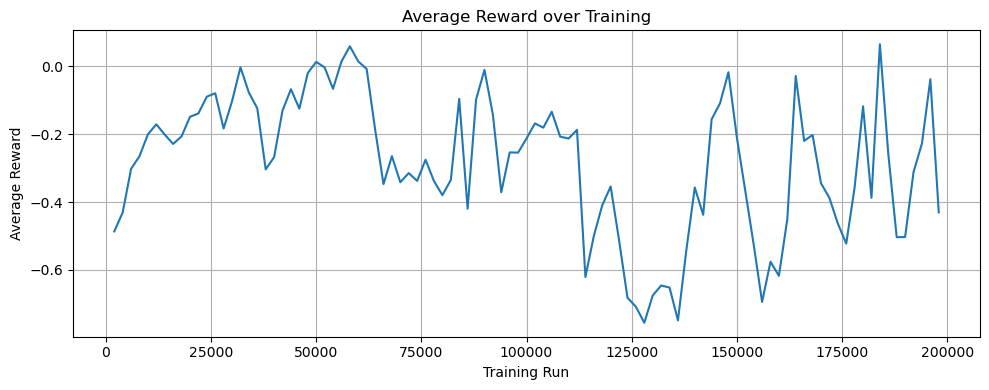

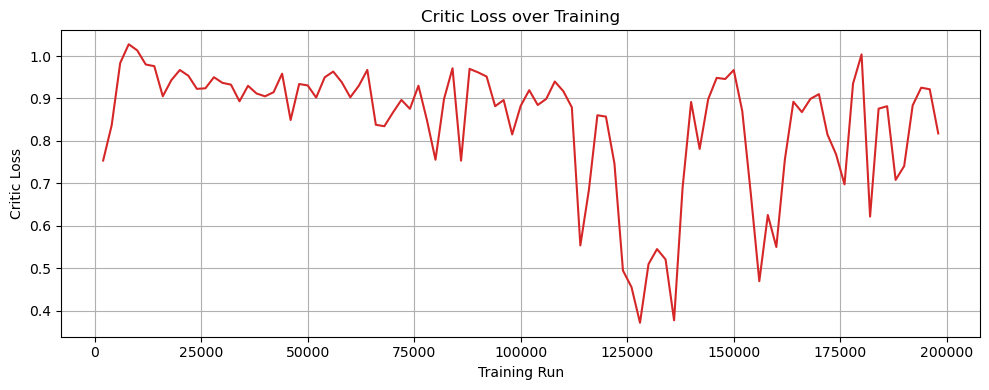

In [10]:
import json
import matplotlib.pyplot as plt

def plot_metrics_from_log(log_file_path):
    runs = []
    avg_rewards = []
    critic_losses = []

    with open(log_file_path, 'r') as f:
        for line in f:
            try:
                entry = json.loads(line)
                runs.append(entry["run"])
                avg_rewards.append(entry["avg_reward"])
                critic_losses.append(entry["critic_loss"])
            except json.JSONDecodeError:
                print(f"Skipping invalid line: {line.strip()}")

    if not runs:
        print("No data to plot.")
        return

    # Plot Average Reward
    plt.figure(figsize=(10, 4))
    plt.plot(runs, avg_rewards, color='tab:blue')
    plt.xlabel('Training Run')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Training')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Critic Loss
    plt.figure(figsize=(10, 4))
    plt.plot(runs, critic_losses, color='tab:red')
    plt.xlabel('Training Run')
    plt.ylabel('Critic Loss')
    plt.title('Critic Loss over Training')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_metrics_from_log(r"C:\Users\MaxA\Desktop\Bhag Chal\experiments\critic_lr_0.0001_actor_lr_1e-05_critic_wd_1e-05_trial_0_20250731_155121\logs\metrics.jsonl")

[tensor(-0.0012), tensor(-0.0004), tensor(0.0003), tensor(-0.0034), tensor(0.0028), tensor(5.1444e-05), tensor(0.0003), tensor(0.0020), tensor(-0.0016), tensor(-0.0015), tensor(-0.0024), tensor(-0.0039), tensor(0.0007), tensor(0.0017), tensor(-0.0013), tensor(-0.0018), tensor(0.0008), tensor(-0.0018), tensor(-0.0018), tensor(0.0019), tensor(-0.0010), tensor(-0.0003), tensor(0.0011), tensor(-0.0006), tensor(-0.0026), tensor(-0.0041), tensor(-0.0016), tensor(0.0007), tensor(-0.0009), tensor(0.0006), tensor(-0.0028), tensor(0.0002), tensor(-0.0005), tensor(0.0002), tensor(0.0003), tensor(0.0006), tensor(-0.0014), tensor(0.0033), tensor(0.0009), tensor(0.0012), tensor(-0.0029), tensor(-0.0011), tensor(0.0025), tensor(0.0011), tensor(-0.0004), tensor(0.0023), tensor(0.0022), tensor(0.0010), tensor(0.0023), tensor(-0.0008), tensor(-0.0007), tensor(0.0033), tensor(0.0002), tensor(-0.0016), tensor(-0.0019), tensor(1.8597e-05), tensor(-0.0017), tensor(0.0035), tensor(-0.0010), tensor(-0.0020), 

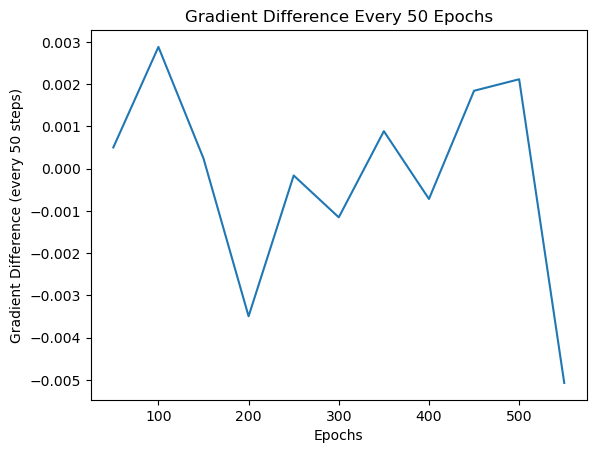

In [23]:
gradient_diff = []
print(avg_gradients)

# Compute gradient differences every 50 steps
for i in range(50, len(avg_gradients), 50):
    diff = avg_gradients[i] - avg_gradients[i - 50]
    gradient_diff.append(diff)

# Plotting
plt.plot(range(50, len(avg_gradients), 50), gradient_diff)
plt.xlabel('Epochs')
plt.ylabel('Gradient Difference (every 50 steps)')
plt.title('Gradient Difference Every 50 Epochs')
plt.show()


In [ ]:
import torch
torch.save(model.state_dict(), 'model_v3_size_5.pth')

In [ ]:
# Define the array
arr = np.array([
    [2, 2, 0, 2, 0],
    [1, 2, 2, 2, 2],
    [2, 2, 2, 2, 2],
    [2, 2, 2, 2, 2],
    [2, 2, 2, 2, 0]
])

action,action_dist = tiger_agent.predict_action(arr)